# Project-2 | Time Series Forcasting On Airplane Passengers

__->__ An Ordered sequence of values of a variable of equally spaced time interval

__->__ A time series is a simpl a series of data points ordered in time.In a time series,__time is often the independent variable__
and the goal is usually to make forecast for the future.

__->__ time series is a statistical technique that deals with time series data ,or trend analysis. Time series data is in a series of 
particular time periods or intervals.

__The data is considered in three types:__
    
__-> Time series data:__ A set of observations on the values that a variable takes at different times.
    
__-> Cross-sectional data:__Data of one or m ore variables,collected at the same point in time.
    
__-> Pooled data:__ A combination of time series data and cross-sectional data

__->__A Time series is a sequential set of data points measured typically over sucessive time.

__->__It is automatically declared as a set of vectors (t+1, t+2, ----) where t represents the time signal

__->__The variable x(t) treated as randm variable

__->__The measurements takes during the event in time series and arranged in proper cronologicl order

__->__The time series consisting records of a single variable asunivariable and more than one variable as multivariabe



## Components

Time series patterns can be described in terms of four basic classes if components:
 
 __->Trend__
   
   __->Seasonal__
   
   __->Cyclical__
   
   __->Irregular__

## Trend Components

Simply ,__Trend__ is the long term direction__ of time series.

A trend exits when there is a long term increase or decrease in the data, It does not have linearity,Sometimes we will refer to trend
__"changing direction"__ when it might go far from  an increasing to a decresing trend.

## Seasonal Component

A regular patterns of variability within certain time periods, such as year.

## Cyclical Component

__-> Any regular pattern of sequences of values above and below the trend line lasting more than one year.__

__-> Regularly occur but may vary in length.__

## Irregular Componrnt(Random Component)

__->__ The variability that is contained within the process that cannot be determined .These fluctuations and variations are caused by 
erratic and irregular actuions that are the result of random chance.

__->__Caused by irregular and unpredictable changes in a time series that are not caused by other components.

__->__unpredictable, random, "residual" fluctuations.

__->__Noise in time series.

## Smoothing Methods

__->__Removes random variations and shows trends and cyclic components.

__->__when a time series contains a large amount of noise,it can be difficut to visulize any underlying trend.

__->__There are two distinct groups of smootihing methods

__A. Averaging smoothing Methods__

__B. Exponential Smoothing Methods__

## Simple Averaging smoothing Methods

__->__The simple moving average smooth past data by arithmetically averaging over a specified period and projecting forward in
time. This is normally considered a smoothing algorithm and has poor forecasting results in most cases.

__->__A noving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends
or cycles.

## Exponential smoothing Methods

__->__Is a technique that can be aplied to time series data,either to produce smoothing data for presentation to make forecasts.

__->__Exponential smoothing methids give large weights to more recent observsations and the weights decrease exponentially as the 
observations become more disrtinct(older).

__->__Simply, __weights decrease exponenentially.__

__->__In other words, __recent observations__ are given relatively more weights in forecasting than the older observations.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pylab as plt

In [4]:
%matplotlib inline

In [5]:
#To define graph size
from matplotlib.pylab import rcParams 

In [6]:
# this codes makes all graph plotted to fixed parameter size as follows
rcParams['figure.figsize'] = 15, 6

## Importing the dataset

In [7]:
data = pd.read_csv('AirPassengers.csv')

In [8]:
print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [9]:
print("\n Data Types: ")
print(data.dtypes)


 Data Types: 
Month          object
#Passengers     int64
dtype: object


__Since month is in object datatype,we need to convert to date format__

__Reading as datetime format:__

In [10]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')# string parse time
# dateparse('1962-01')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)#converting sting to date format
print (data.head())# index_col='Month': month acts as index column

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


C:\Users\dinesh Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [11]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [13]:
# converting to time series:
# The whole passenger data get maped to ts frmae
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

## Indexing TS arrays: 

__specific the index as a string constant:__

In [14]:
ts['1949-01-01']

112

__2. Import the datetime library and use 'datetime' function:__

In [15]:
from datetime import datetime

In [16]:
ts[datetime(1949,1,1)]

112

__Get Range__

__specify the entire range__

In [17]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [18]:
# if one index is at the end

ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [19]:
#All rows of year:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

# Checking for Stationarity

## Stationarity

__->__A time series is said to be stationary if its statistical properties such as the mean, varience remain constant
over time.


__->__ Most of the Time series models work on the assu ption that the TS is stationary.Major reason for this is that there are many ways in which a series can be non-stationary,but only one way for stationnarity.


__->__Inclusively we csn say that time series has a particular behaviour over time,there is a way high probab ility that if the same in future.


__->__Also the theories related to stationary series are more and easier ro implement as compared to non-stationary series.

## plot the time-series

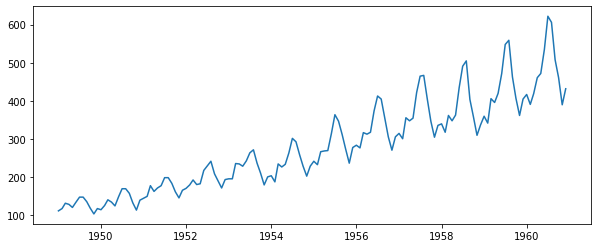

In [20]:
plt.figure(figsize =(10,4))
plt.plot(ts)

## Function for Testing

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #if rolling mean or moving mean and std for 12 months remains constnat with time it would be timeseries so we need to analyse relation bn mean and std
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    #plot rolling statistics:
    plt.figure(figsize =(12,5))
    orig = plt.plot(timeseries, color='blue', label ='original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color ='black', label = 'rolling std')
    plt.legend(loc='best')
    plt.title("rolling Mean and standard deviation")
    plt.show(block=False)
    
    #perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    

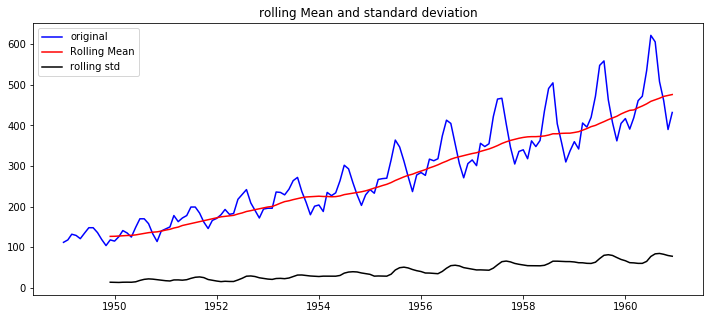

Results of Dickey-Fuller Test: 
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [23]:
test_stationarity(ts)

-> Blue line is the actual trend of original data with respect to time.

-> red line is rolling mean and which is not constant with time.

-> black line is rolling std which is slightly constant with time.

__So data which is analysed is not stationary since rolling mewn and rolling std differs or varies with time__

__p-vlaue should be grater and when p-vlaue gets varying or increasing we may conclude data is getting stationary__

# Making TS Stationary

## Estimating & Eliminating Trend

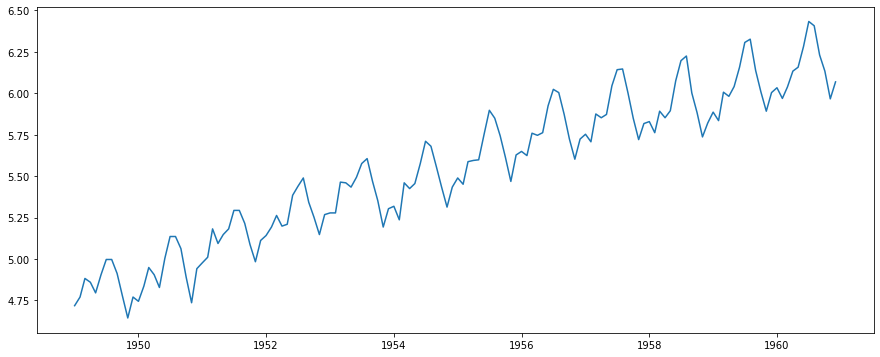

In [24]:
ts_log = np.log(ts)
plt.plot(ts_log)

# Smoothing:
 
## Moving average

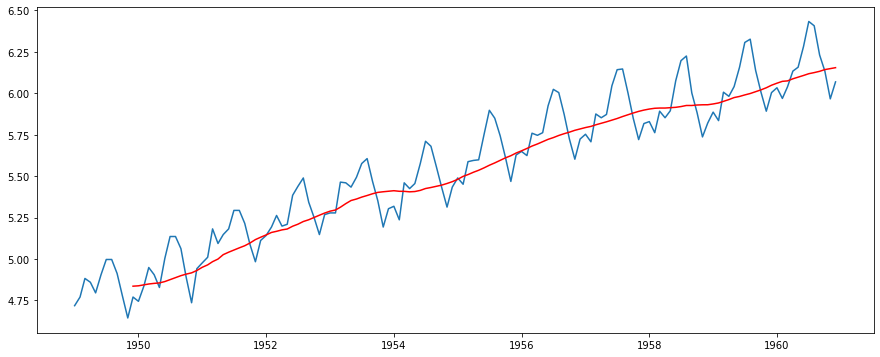

In [25]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [26]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)


Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

#### Since it is moving average we will not get result for first 12 months aqnd that computed result wil sent as moving mean to next 12 months.

In [27]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

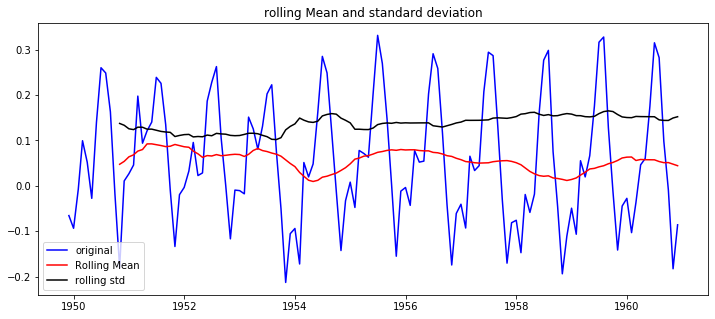

Results of Dickey-Fuller Test: 
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [28]:
test_stationarity(ts_log_moving_avg_diff)


### Almost the mean and std is better than previous graph and p-value is reduced to 0.2 or shrink and means std are getting constant

### Exponentially Weighted Moving Average

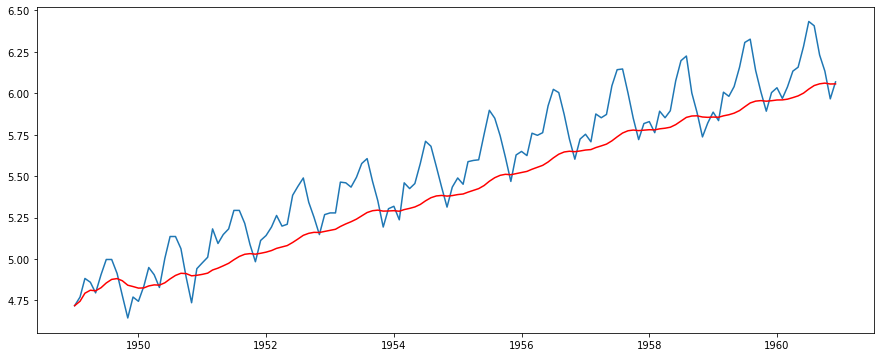

In [29]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

#df.ewm(com=0.5).mean()

In [30]:
expwighted_avg

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
                ...   
1960-08-01    6.046445
1960-09-01    6.056778
1960-10-01    6.061079
1960-11-01    6.055750
1960-12-01    6.056461
Name: #Passengers, Length: 144, dtype: float64

In [31]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

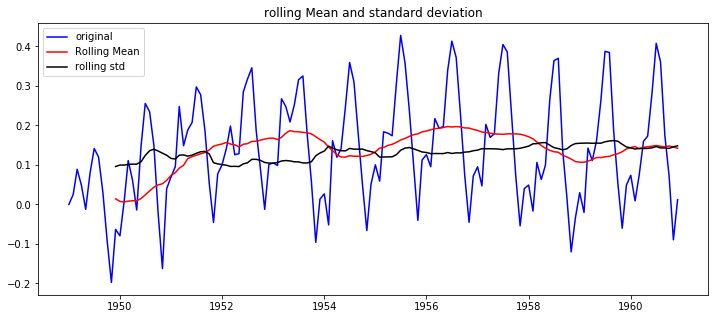

Results of Dickey-Fuller Test: 
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [32]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing:

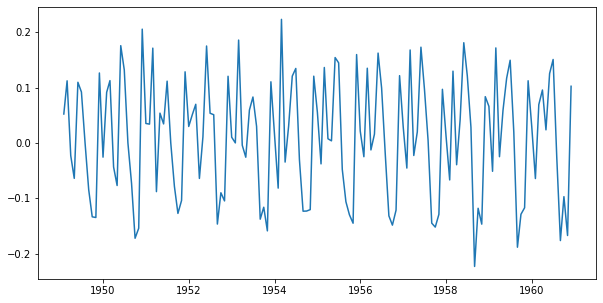

In [34]:
#Take first difference:
plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

<Figure size 864x432 with 0 Axes>

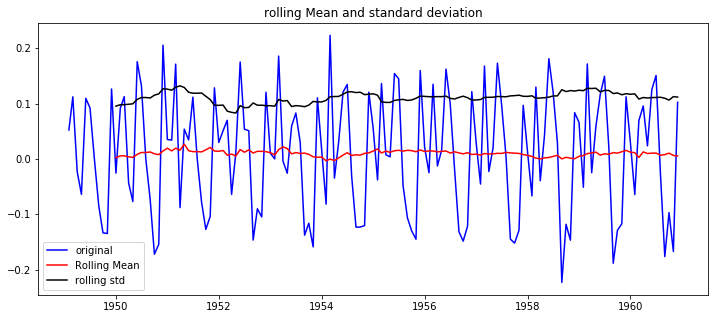

Results of Dickey-Fuller Test: 
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [35]:
plt.figure(figsize=(12,6))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

## Decomposition:


#### Dividing the data as trend seasonal and resid


##### Decomposing using statsmodels
__-> we can use statsmodels to predict a decomposition of this timeseries.__

__-> The decomposition of the timeseries task thatdeconstructs a time series into several components,each representing one of the analysing components of patterns.__

__->with statsmodels we will be able to see the trend,seasonal, and residual components of the data.__

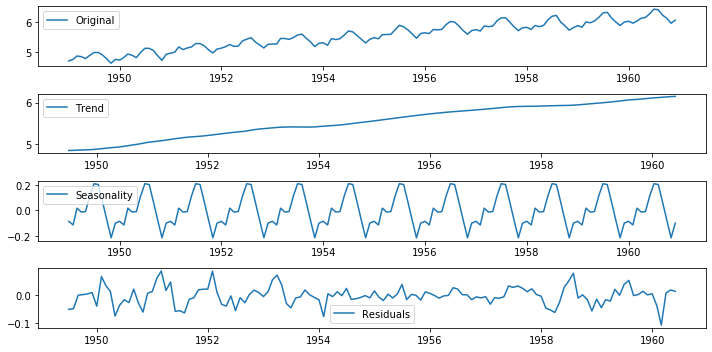

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 864x360 with 0 Axes>

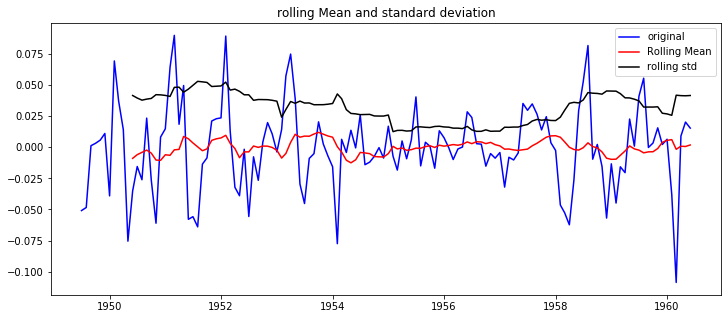

Results of Dickey-Fuller Test: 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [37]:
plt.figure(figsize=(12,5))
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

When auto correlation factor is good we canuse only ARM

when PACF is good or trend are not constant we use only MA model

if we have no clarity in correlation we useARIMA



### we can check stationarity using the folowing

__-> ACF and PACF plots if the time series is stationary,the ACF/PACF plots will show a quick drop-off in correlation after a small amount
of lag between.__

__->Ploting Rolling Statistics: we can plot the moving average of moving statistics and see if it varies with time.moving
    average/varience is for any instance T,the average/varience of last year i.e last 12 months.__
    
__->Augmented dickey Fuller Method: Ths is one of the statistical tests sor checking statiionarity.Hence null hypothesis
        is that TS is non-stationary. The test results comprise of Test statistic and some critical values for differnt 
        confidence levels__
        
  __->if the test statistics is less than the critical value we can impact null hypothesis and say series is stationary.__

In [38]:
from statsmodels.tsa.arima_model import ARIMA

__ACF and PACF Plots__

C:\Users\dinesh Pc\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


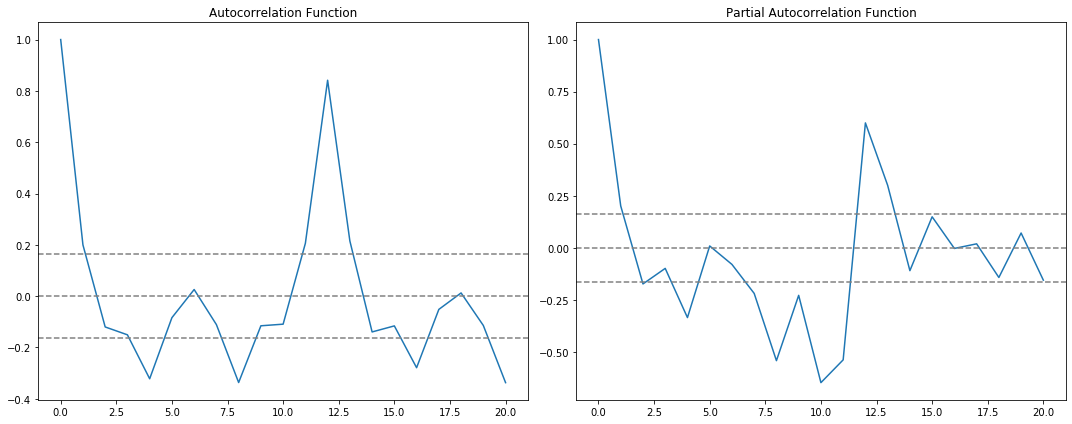

In [39]:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:  
#plt.figure(figsize=(10,5))
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
#plt.figure(figsize=(10,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

1 menas 100% correlation and trend decrease as further and in 0 no correlatrion and therefore the model is very good for

time series analysis and in zero some datapoints are present but most of them are positve and negative correlation and passes the trnd of analysis.

## AR Model:

__-> The AutoRegressin method enables the next step in the sequence as a linear function of observation at point  time shape.__

__-> p isthe parameter associated with rhe auto-regressive aspect of model which incorporates past values i.e logs of dependent variables .__

C:\Users\dinesh Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dinesh Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

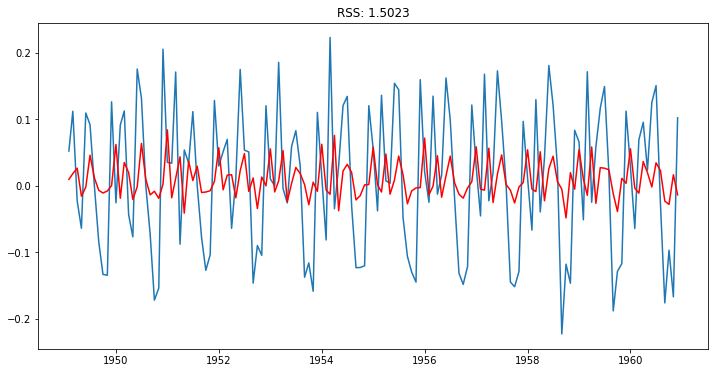

In [40]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

## MA Model


__->Number of MA(Moving Average[q]): q is the size of moving average past window od the model(i.e laged forecast errors in prediction equation__

C:\Users\dinesh Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dinesh Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

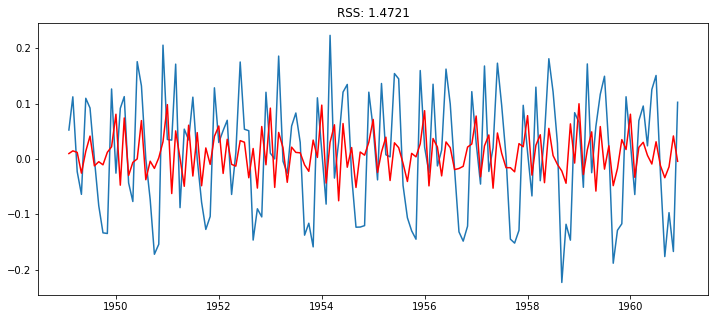

In [41]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

__->Number of AR(Auto Regression): p is the parameter associated with the auto-regression aspect of the model,which incorporates past values i.e lags of dependent variables__

__->Number of MA(Moving Average): q is the parameter associated with the moving average aspect of the model,which incorporates past window of the model(i.e lagged forecast errors inpredicion equation) __

C:\Users\dinesh Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dinesh Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

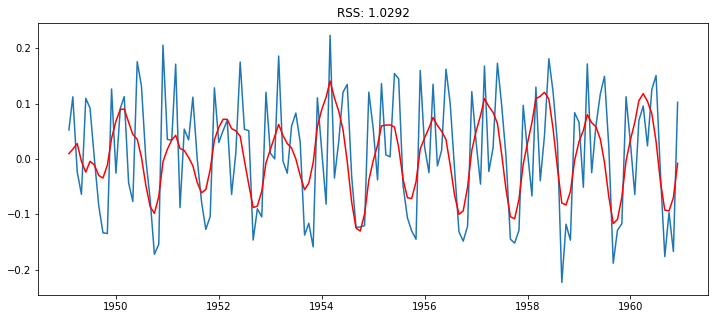

In [42]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

## Convert to original scale:

In [43]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [44]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [45]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [46]:
predictions_ARIMA_log.head(10)

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665110
dtype: float64

In [47]:
ts_log.head(10)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: #Passengers, dtype: float64

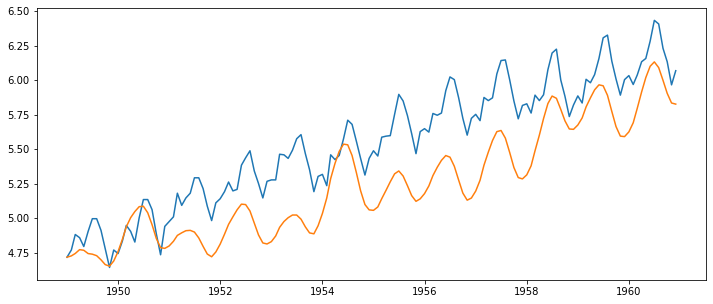

In [48]:
plt.figure(figsize=(12,5))
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 90.1044')

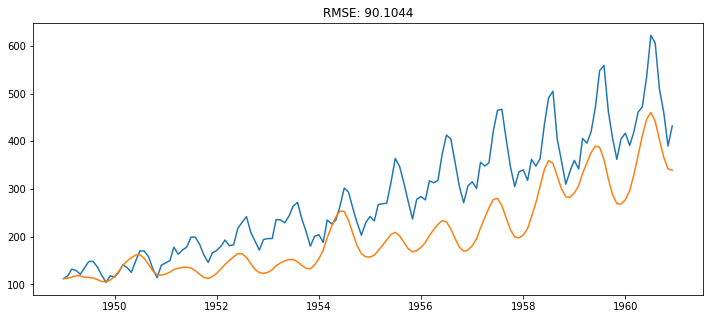

In [49]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [50]:
predictions_ARIMA

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073417
1949-04-01    118.301994
1949-05-01    117.768372
                 ...    
1960-08-01    441.886253
1960-09-01    402.905785
1960-10-01    366.753412
1960-11-01    341.984737
1960-12-01    339.216741
Length: 144, dtype: float64

In [51]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


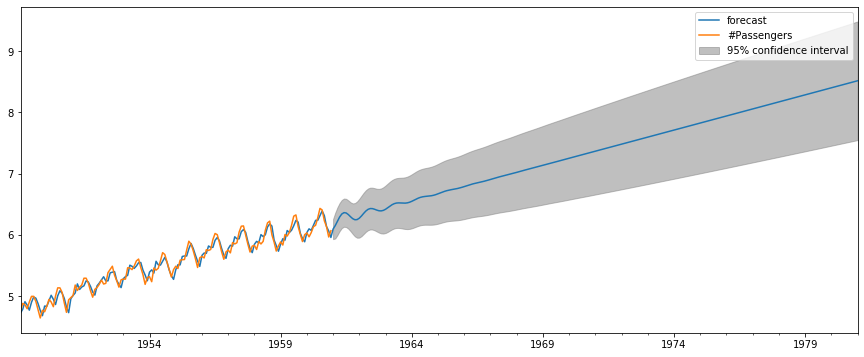

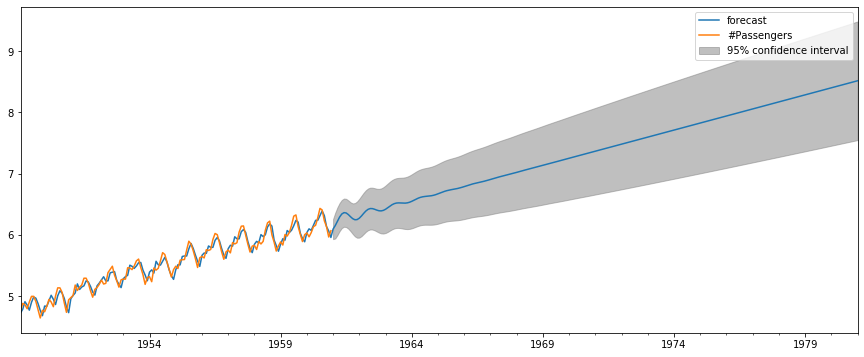

In [52]:
results_ARIMA.plot_predict(1,384)

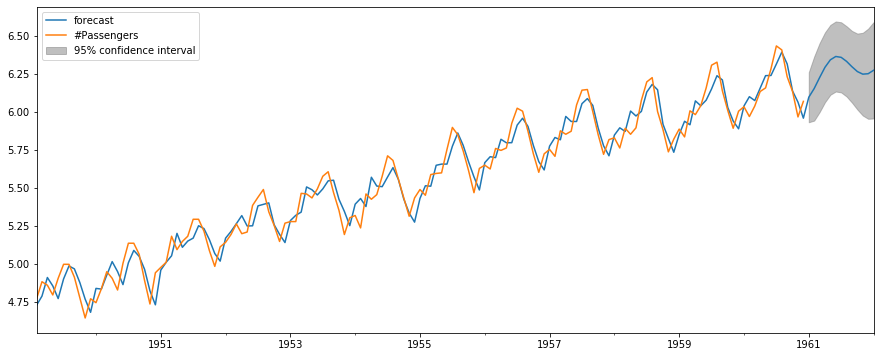

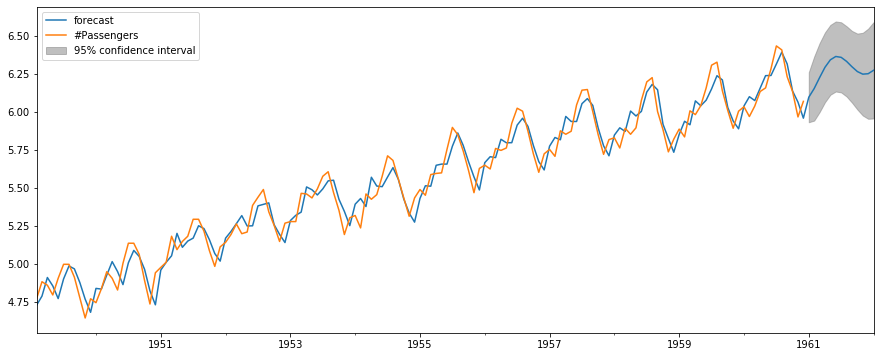

In [53]:
results_ARIMA.plot_predict(1,156)

In [55]:
x=results_ARIMA.forecast(steps=156)

In [56]:
x

(array([6.09553397, 6.15281409, 6.2244297 , 6.29241103, 6.34164716,
        6.36359359, 6.35784682, 6.33139301, 6.29597537, 6.26447711,
        6.24738323, 6.25025169, 6.27275833, 6.30940308, 6.35151489,
        6.38988652, 6.41727379, 6.43011054, 6.4290669 , 6.4184249 ,
        6.40456155, 6.39403615, 6.3918308 , 6.40019499, 6.41833687,
        6.44295402, 6.46937431, 6.49293983, 6.51024118, 6.51989034,
        6.52267581, 6.52112389, 6.51864527, 6.51853688, 6.5231192 ,
        6.53322356, 6.54812865, 6.56591553, 6.58410306, 6.60036538,
        6.61313266, 6.62192782, 6.6273779 , 6.6309313 , 6.63438689,
        6.63937984, 6.64696502, 6.65739838, 6.67015322, 6.68414249,
        6.69806625, 6.710779  , 6.72157732, 6.73033985, 6.73749812,
        6.74386379, 6.75037323, 6.75782592, 6.76668681, 6.77699822,
        6.78841318, 6.80032852, 6.81207194, 6.8230876 , 6.83307137,
        6.84202493, 6.85022313, 6.85811222, 6.86617341, 6.87479151,
        6.88416302, 6.89426383, 6.90487889, 6.91